In [1]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#Load dataset
dataset = pd.read_csv('./Expenses.csv')
dataset.head()

,age,sex,bmi,children,smoker,region,expenses,expenses_level
0,19,female,27.9,0,yes,southwest,16884.92,High
1,18,male,33.8,1,no,southeast,1725.55,Low
2,28,male,33.0,3,no,southeast,4449.46,Moderate
3,33,male,22.7,0,no,northwest,21984.47,Low
4,32,male,28.9,0,no,northwest,3866.86,Moderate


In [5]:
#Key Statistics
dataset.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [7]:
#View Data Types
dataset.dtypes

age                 int64
sex                object
bmi               float64
children            int64
smoker             object
region             object
expenses          float64
expenses_level     object
dtype: object

In [9]:
#import preprocessing libraries to train data
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Encode categorical variables
categorical_columns = ['sex','smoker', 'region']  # Replace 'sex' with actual categorical column names
label_encoders = {}

for col in categorical_columns:
    le = LabelEncoder()
    dataset[col] = le.fit_transform(dataset[col])
    label_encoders[col] = le  # Save encoder for inverse transformation if needed
#Create x and y variables
x = dataset.drop('expenses_level', axis=1).to_numpy()
y = dataset['expenses_level'].to_numpy()

#Create Train and Test Datasets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,stratify=y,random_state = 100) 

#Scale the Data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train2 = sc.fit_transform(x_train)
x_test2 = sc.transform(x_test)
#First Model: Naive Bayes - Script
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix  

for name,method in [('Naive Bayes - GB',GaussianNB())]: 
    method.fit(x_train2,y_train)
    predict = method.predict(x_test2)
    target_names=['high','low', 'moderate']
    print('\nEstimator: {}'.format(name)) 
    print('\n',confusion_matrix(y_test,predict))  
    print(classification_report(y_test,predict,target_names=target_names))  


Estimator: Naive Bayes - GB

 [[145   2  48]
 [  1   0  18]
 [  0   0  54]]
              precision    recall  f1-score   support

        high       0.99      0.74      0.85       195
         low       0.00      0.00      0.00        19
    moderate       0.45      1.00      0.62        54

    accuracy                           0.74       268
   macro avg       0.48      0.58      0.49       268
weighted avg       0.81      0.74      0.74       268



In [11]:
#Second Model: Decision Tree - Script
from sklearn.tree import DecisionTreeClassifier  

for name,method in [('DT', DecisionTreeClassifier(random_state=100))]: 
    method.fit(x_train2,y_train)
    predict = method.predict(x_test2)
    target_names=['high','low','moderate']
    print('\nEstimator: {}'.format(name)) 
    print(confusion_matrix(y_test,predict))  
    print(classification_report(y_test,predict,target_names=target_names))  


Estimator: DT
[[192   3   0]
 [  1  18   0]
 [  0   1  53]]
              precision    recall  f1-score   support

        high       0.99      0.98      0.99       195
         low       0.82      0.95      0.88        19
    moderate       1.00      0.98      0.99        54

    accuracy                           0.98       268
   macro avg       0.94      0.97      0.95       268
weighted avg       0.98      0.98      0.98       268



In [17]:
#Importing libraries and training variabes for SVM model
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Encode categorical variables
categorical_columns = ['sex','smoker', 'region']  # Replace 'gender' with actual categorical column names
label_encoders = {}

for col in categorical_columns:
    le = LabelEncoder()
    dataset[col] = le.fit_transform(dataset[col])
    label_encoders[col] = le  # Save encoder for inverse transformation if needed
#Create x and y variables
x = dataset.drop('expenses_level', axis=1).to_numpy()
y = dataset['expenses_level'].to_numpy()

#Create Train and Test Datasets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,stratify=y,random_state = 100) 

#Scale the Data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train2 = sc.fit_transform(x_train)
x_test2 = sc.transform(x_test)

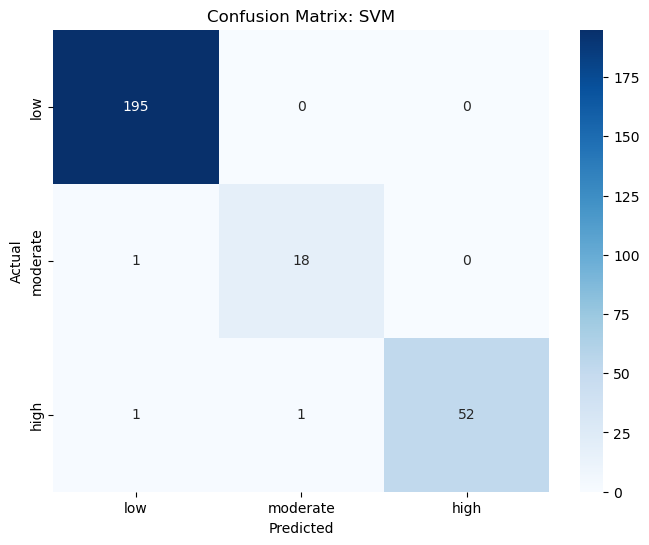


Estimator: SVM
[[195   0   0]
 [  1  18   0]
 [  1   1  52]]
              precision    recall  f1-score   support

        high       0.99      1.00      0.99       195
         low       0.95      0.95      0.95        19
    moderate       1.00      0.96      0.98        54

    accuracy                           0.99       268
   macro avg       0.98      0.97      0.97       268
weighted avg       0.99      0.99      0.99       268



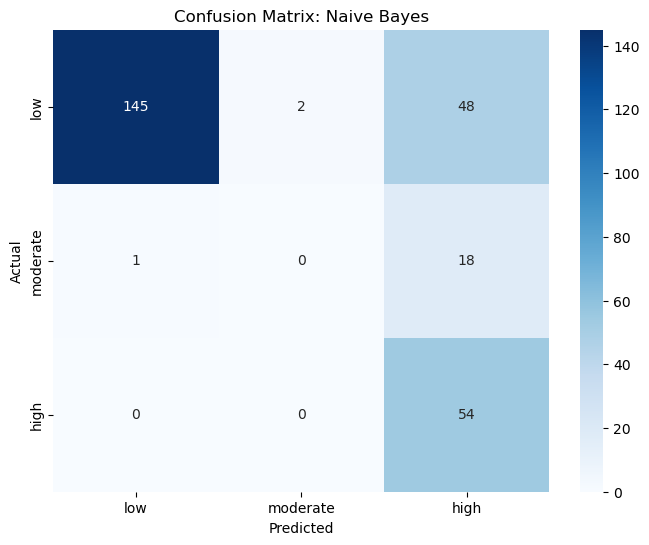


Estimator: Naive Bayes
[[145   2  48]
 [  1   0  18]
 [  0   0  54]]
              precision    recall  f1-score   support

        high       0.99      0.74      0.85       195
         low       0.00      0.00      0.00        19
    moderate       0.45      1.00      0.62        54

    accuracy                           0.74       268
   macro avg       0.48      0.58      0.49       268
weighted avg       0.81      0.74      0.74       268



In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix 

for name,method in [('SVM', SVC(kernel='linear',random_state=100)),
                    ('Naive Bayes',GaussianNB())]: 
    method.fit(x_train2,y_train)
    predict = method.predict(x_test2)
    
     # Creating confusion matrix
    cm = confusion_matrix(y_test, predict)
    
    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['low', 'moderate', 'high'], 
                yticklabels=['low', 'moderate', 'high'])
    plt.title(f'Confusion Matrix: {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    
    target_names=['high','low','moderate']
    print('\nEstimator: {}'.format(name)) 
    print(confusion_matrix(y_test,predict))  
    print(classification_report(y_test,predict,target_names=target_names))  

In [41]:
#Fourth Model: Neural Network
# Define bins and labels
bins = [-np.inf, 10000, 20000, np.inf]  # Adjust bin edges based on your data
labels = ['Low', 'Moderate', 'High']

# Convert continuous values to categorical labels
y_train_binned = pd.cut(y_train, bins=bins, labels=labels)
y_test_binned = pd.cut(y_test, bins=bins, labels=labels)

# Update the model
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix

mlp = MLPClassifier(hidden_layer_sizes=(4, 3, 3),
                    activation='relu', solver='adam',
                    max_iter=10000, random_state=100)
mlp.fit(x_train2, y_train_binned)
predictions = mlp.predict(x_test2)

# Evaluation Report and Confusion Matrix
target_names = ['High', 'Low', 'Moderate']
print(confusion_matrix(y_test_binned, predictions))
print(classification_report(y_test_binned, predictions, target_names=target_names))


[[ 44   5   8]
 [  0 155   0]
 [  2   4  50]]
              precision    recall  f1-score   support

        High       0.96      0.77      0.85        57
         Low       0.95      1.00      0.97       155
    Moderate       0.86      0.89      0.88        56

    accuracy                           0.93       268
   macro avg       0.92      0.89      0.90       268
weighted avg       0.93      0.93      0.93       268



<Axes: >

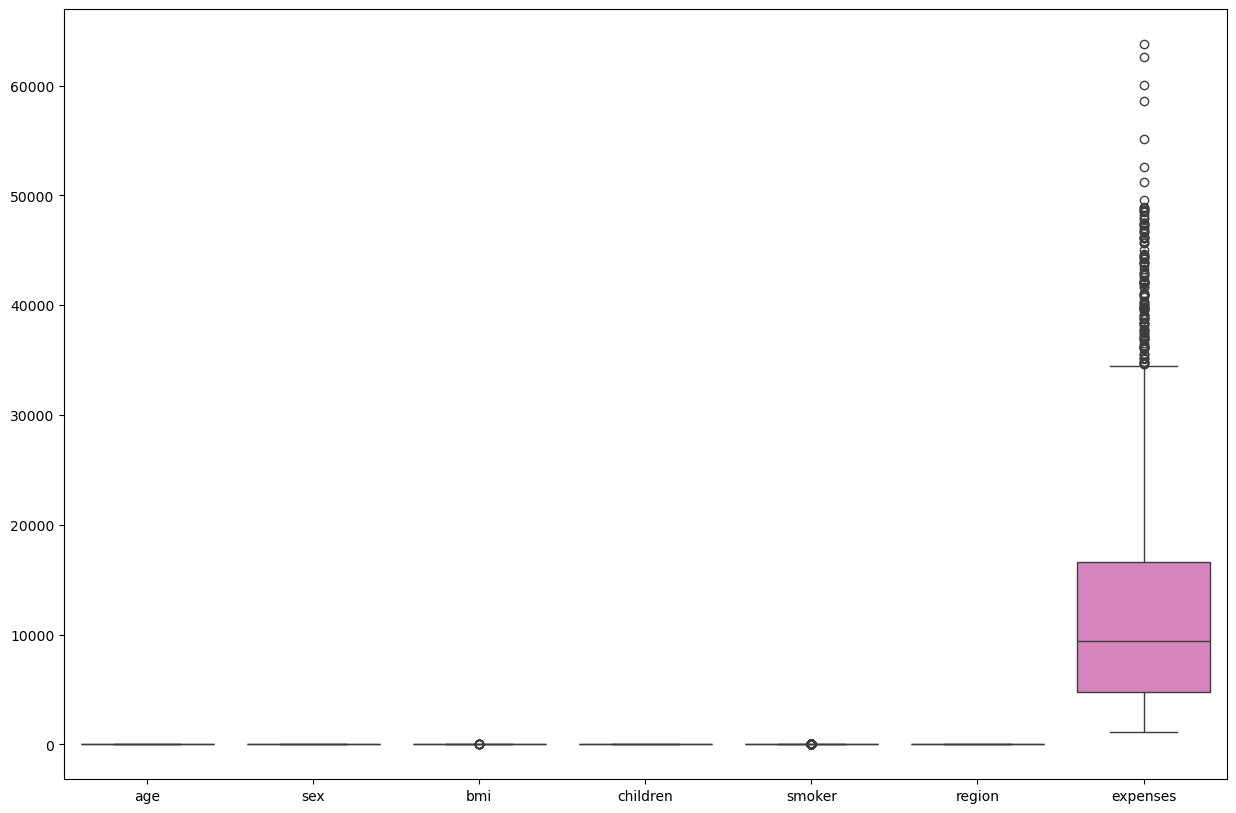

In [25]:
#Fifth Model: MLR
#Boxplot Visualization
import seaborn as sns
plt.figure(figsize=(15,10))
sns.boxplot(data=dataset)

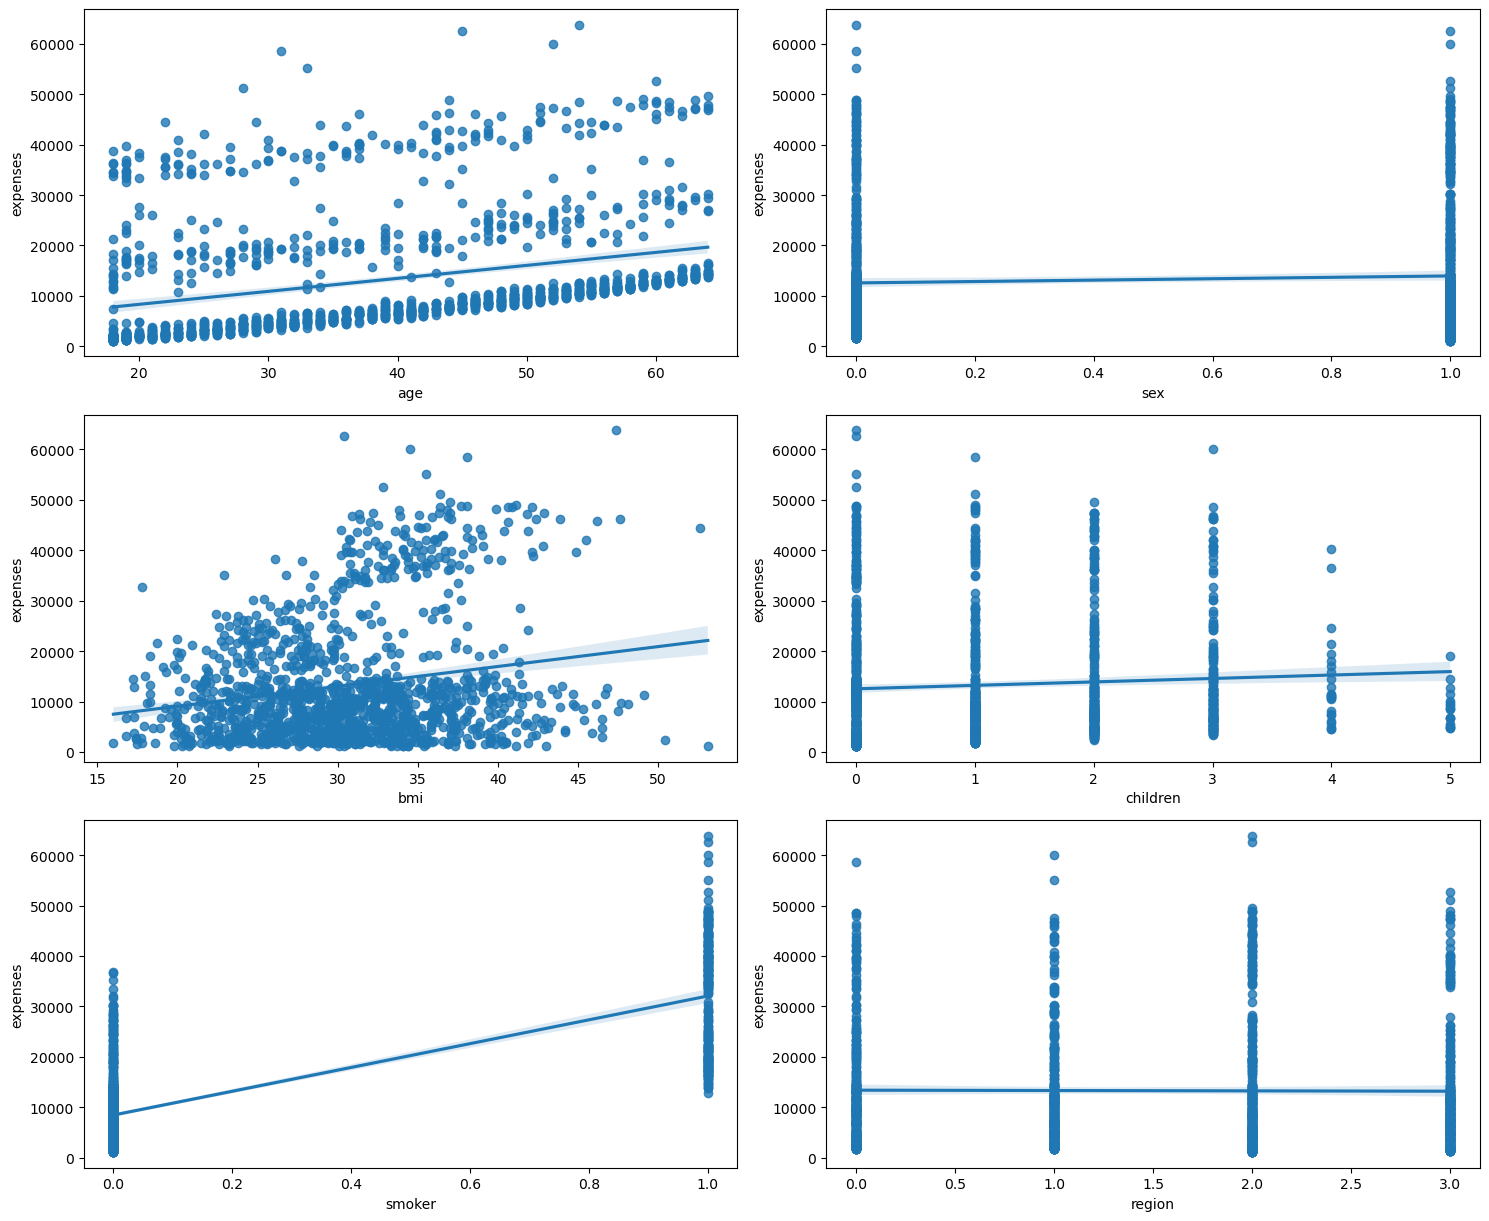

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatterplots - expenses_level vs Independent Variables
plt.figure(figsize=(15, 20))

cnt = 1
for col in dataset.columns:
    # Skip the target variable and non-numeric columns
    if col == 'expenses_level' or col == 'expenses':
        continue

    plt.subplot(5, 2, cnt)
    lmgraph = sns.regplot(x=dataset[col], y=dataset.expenses)
    lmgraph.set_xlabel(col)
    lmgraph.set_ylabel('expenses')
    cnt += 1 

plt.tight_layout()
plt.show()

In [33]:
#import necessary libaries
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
# Encode 'expenses_level' into numeric values

dataset['expenses_level'] = LabelEncoder().fit_transform(dataset['expenses_level'])

# Split features (X) and target (y)
X = dataset.drop(columns=['expenses_level', 'expenses'])
y = dataset['expenses']

# Split the data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
x_train2 = scaler.fit_transform(x_train)
x_test2 = scaler.transform(x_test)

# Fit the model
model = LinearRegression()
model.fit(x_train2, y_train)

# Predictions
predictions = model.predict(x_test2)

# Display results
print(f"Intercept: {model.intercept_:.2f}")
print("Coefficients:")
print(pd.DataFrame(model.coef_, X.columns, columns=['Coefficient']))

# Metrics
r2 = metrics.r2_score(y_test, predictions)
adjusted_r2 = 1 - (1 - r2) * (len(y) - 1) / (len(y) - X.shape[1] - 1)

print(f"R2: {r2:.2f}")
print(f"Adjusted R2: {adjusted_r2:.2f}")
print(f"Mean Absolute Error: {metrics.mean_absolute_error(y_test, predictions):.2f}")
print(f"Mean Squared Error: {metrics.mean_squared_error(y_test, predictions):.2f}")
print(f"Root Mean Squared Error: {np.sqrt(metrics.mean_squared_error(y_test, predictions)):.2f}")

Intercept: 13346.09
Coefficients:
          Coefficient
age       3615.855916
sex         -9.349643
bmi       2029.222126
children   517.114360
smoker    9556.783355
region    -302.319105
R2: 0.78
Adjusted R2: 0.78
Mean Absolute Error: 4186.94
Mean Squared Error: 33639075.09
Root Mean Squared Error: 5799.92
